Import project source code and plotting function.

In [5]:
from APOExptime import Sky, Target, Instrument, Observation
import matplotlib.pyplot as plt

Create sky object. Lunar phase can go from 0 (New moon) to 1 (Full moon). Seeing is in arcseconds.

In [6]:
sky = Sky(lunar_phase=0, seeing=1)

Create Target Object. First entry is the target's magnitude, second entry is a string that specifies the magnitude system of the input magnitude, third entry is the band pass for entered magnitude (Entered example is the V bandpass), and the last entry is the black-body temprature of the target. Default value is solar temprature.

In [16]:
star = Target(15, 'VEGAMAG', [4700, 6900], temp=6000)

Create Instrument object. Can choose between 5 instruments (Case Sensitive):  Arctic, Arces, DIS, TripleSpec, and NICFPS.

In [22]:
inst = Instrument('DIS')

Create an observation given a star, sky, and instrument.

In [23]:
ob = Observation(star, sky, inst)

SNfromTime() takes an input exposure time in seconds and both outputs and saves an array with S/N values.
TimefromSN() takes an input S/N and both outputs and saves an array with required exposure times.

In [24]:
sn1 = ob.SNfromTime(200) #value in seconds

t1 = ob.TimefromSN(50) #value in S/N ratio

Takes observation object and wanted plots ('SN' for plotting SN per filter or wavelenth and 'Time' for plotting time per filter/wavelength) and creates the desired plots (works... kinda. Still needs more work to make nice).

In [11]:
print(sn1)

[[array([ 8062,  8063,  8064, ..., 24943, 24944, 24945]), array([0.00211182, 0.00211063, 0.00210176, ..., 0.03474736, 0.01615762,
       0.00169489]), 'TripleSpec_default_effic']]


Plot S/N vs wavelength

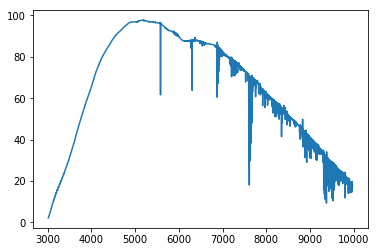

In [27]:
plt.plot(sn1[0][0], sn1[0][1])

Plot needed exposure time vs wavelength

(0, 2000)

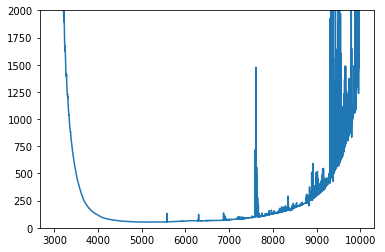

In [28]:
plt.plot(t1[0][0], t1[0][1])
plt.ylim((0, 2000))

Lets use a new instrument now, in this case an imager called Arctic

In [29]:
inst2 = Instrument('Arctic')

Now lets make an observation with this new instrument on the same target as before.
We can use the same sky and star objects made before

In [30]:
ob2 = Observation(star, sky, inst2)

We'll calcuate the S/N and exposure time using the same values as before, but now the output will be diffrent

In [31]:
sn2 = ob.SNfromTime(200) #value in seconds

t2 = ob.TimefromSN(50) #value in S/N ratio

In [32]:
print(sn2)
print(t2)

[[array([3012, 3013, 3014, ..., 9972, 9973, 9974]), array([ 2.18900957,  2.25637496,  2.31136042, ..., 18.06567455,
       18.0556347 , 17.97714701]), 'DIS_B1200_effic'], [array([2400, 2401, 2402, ..., 9959, 9960, 9961]), array([1.53865613e-02, 9.36324755e-03, 3.42917753e-03, ...,
       1.42548297e+01, 1.80787043e+01, 1.67364593e+01]), 'DIS_B400_effic'], [array([3487, 3488, 3489, ..., 9947, 9948, 9949]), array([ 3.38752814,  3.43868572,  3.48236464, ..., 31.04086337,
       23.7993586 , 28.06514902]), 'DIS_R300_effic'], [array([4437, 4438, 4439, ..., 9972, 9973, 9974]), array([14.13216097, 14.19356835, 14.25705574, ..., 33.17993779,
       33.13886213, 32.96876528]), 'DIS_R830_effic'], [array([3037, 3038, 3039, ..., 9897, 9898, 9899]), array([-4.68980061, -4.81367579, -4.8483906 , ..., 27.62539136,
       34.19251998, 32.28527206]), 'DIS_R1200_effic']]
[[array([3012, 3013, 3014, ..., 9972, 9973, 9974]), array([46523.26349764, 44741.25902248, 43366.90278788, ...,
        1481.72391551,

Now each index is a filter in the imager